## The Data

In [0]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [33]:
file = 'Time-Series-Data.xlsx'
sheet = 'Monthly' # change excel sheet
data = pd.read_excel(file, sheet)

timestamp = data.columns[0]
weather_aspect = data.columns[2] # change examining aspect of weather
weather = data.filter(items = [timestamp, weather_aspect])
weather.head()

,Month,Precipitation
0,2010-01-01,31.19
1,2010-02-01,3.44
2,2010-03-01,6.30
3,2010-04-01,13.60
4,2010-05-01,46.39


## Indexing with Time Series Data

In [34]:
weather = weather.set_index(timestamp)
weather.index

DatetimeIndex(['2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01',
               ...
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01'],
              dtype='datetime64[ns]', name='Month', length=114, freq=None)

In [35]:
train_start = '2010' # change the start of train data
resample = 'MS' # change the resample rule
y = weather[weather_aspect].resample(resample).mean()
y[train_start:]

Month
2010-01-01     31.19
2010-02-01      3.44
2010-03-01      6.30
2010-04-01     13.60
2010-05-01     46.39
2010-06-01     86.48
2010-07-01     62.39
2010-08-01     61.75
2010-09-01     49.33
2010-10-01     25.32
2010-11-01      5.86
2010-12-01     12.55
2011-01-01      1.31
2011-02-01      3.27
2011-03-01     26.72
2011-04-01     11.66
2011-05-01     24.81
2011-06-01    148.18
2011-07-01     72.94
2011-08-01     93.64
2011-09-01     98.82
2011-10-01     21.80
2011-11-01     20.41
2011-12-01      3.42
2012-01-01      6.59
2012-02-01      2.21
2012-03-01      4.17
2012-04-01     15.16
2012-05-01     74.47
2012-06-01     47.95
               ...  
2017-01-01     36.50
2017-02-01      2.29
2017-03-01      7.56
2017-04-01     20.36
2017-05-01     51.11
2017-06-01     59.31
2017-07-01    110.46
2017-08-01     71.16
2017-09-01     84.51
2017-10-01     47.90
2017-11-01      5.81
2017-12-01     10.17
2018-01-01      7.55
2018-02-01      1.51
2018-03-01     17.61
2018-04-01     47.47
2018-05

## Visualizing Furniture Sales Time Series Data

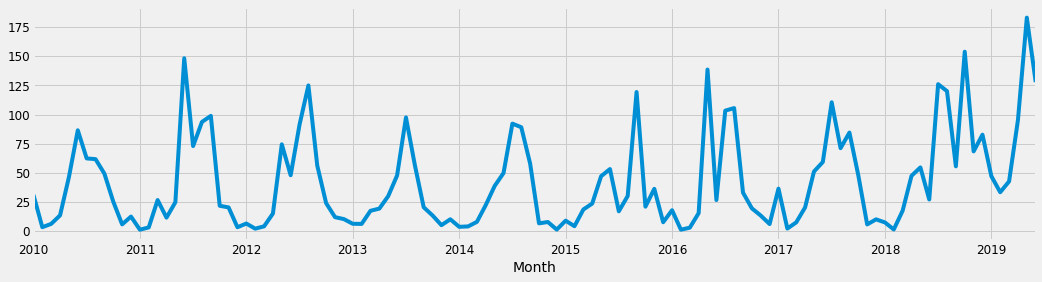

In [36]:
y.plot(figsize=(16, 4))
plt.show()

We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: 
* trend
* seasonality
* noise.

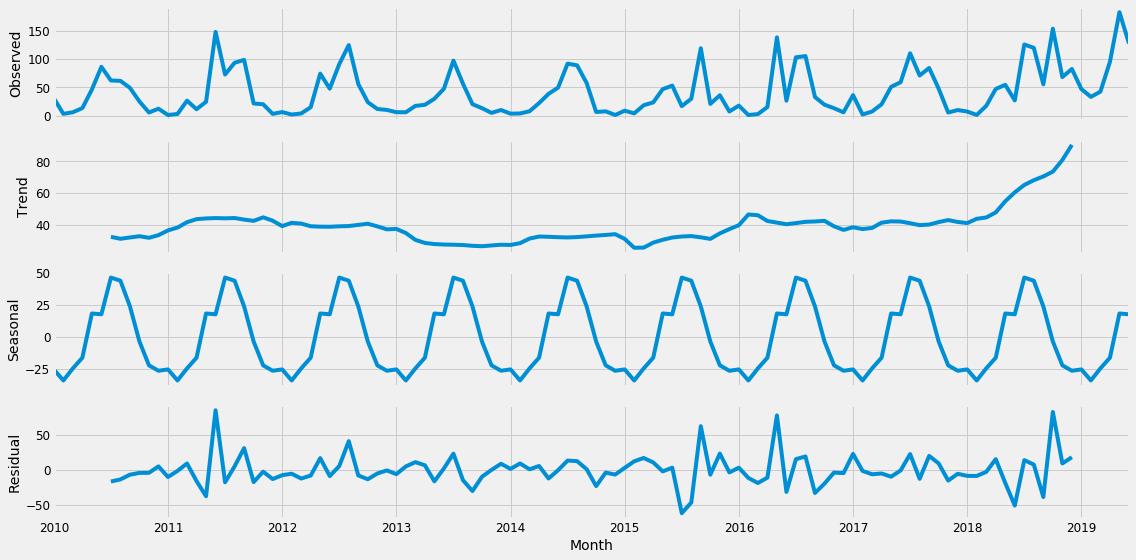

In [37]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

Notes:

## Time series forecasting with ARIMA

We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.

ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data:

In [38]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
period = 12 # change seasonal period
seasonal_pdq = [(x[0], x[1], x[2], period) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


This step is parameter Selection for our furniture’s sales ARIMA Time Series Model. Our goal here is to use a “grid search” to find the optimal set of parameters that yields the best performance for our model.

In [39]:
optimal_result = 10**5
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order = param,
                                            seasonal_order = param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            
            print('ARIMA{}x{}{} - AIC:{}'.format(param, param_seasonal, period, results.aic))
            
            if results.aic < optimal_result:
              optimal_result = results.aic
              optimal_order = param
              optimal_seasonal_order = param_seasonal
            
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1242.6566409473196
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1085.5292581106783
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1028.3624070919886
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:890.8300691726638
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1038.8967042258794
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1007.4787059189234
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:905.5055954111789
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:895.704286562261
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1179.596440056222
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1047.3084514402506
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1019.1886250760577
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:878.7541540920524
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1036.5008318950995
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:996.348617189358
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:902.1595131332144
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:883.8810395104476
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1145.4698714457782
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1032.6194872019744
AR

In [40]:
print('ARIMA{}x{}{} - AIC:{}'.format(optimal_order, optimal_seasonal_order, period, optimal_result))

ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:854.064336334712


## Fitting the ARIMA model

In [41]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order = optimal_order,
                                seasonal_order = optimal_seasonal_order,
                                enforce_stationarity = False,
                                enforce_invertibility = False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8255      0.062    -13.393      0.000      -0.946      -0.705
ma.S.L12      -0.7484      0.130     -5.772      0.000      -1.002      -0.494
sigma2       951.8958     91.925     10.355      0.000     771.727    1132.065


We should always run model diagnostics to investigate any unusual behavior.

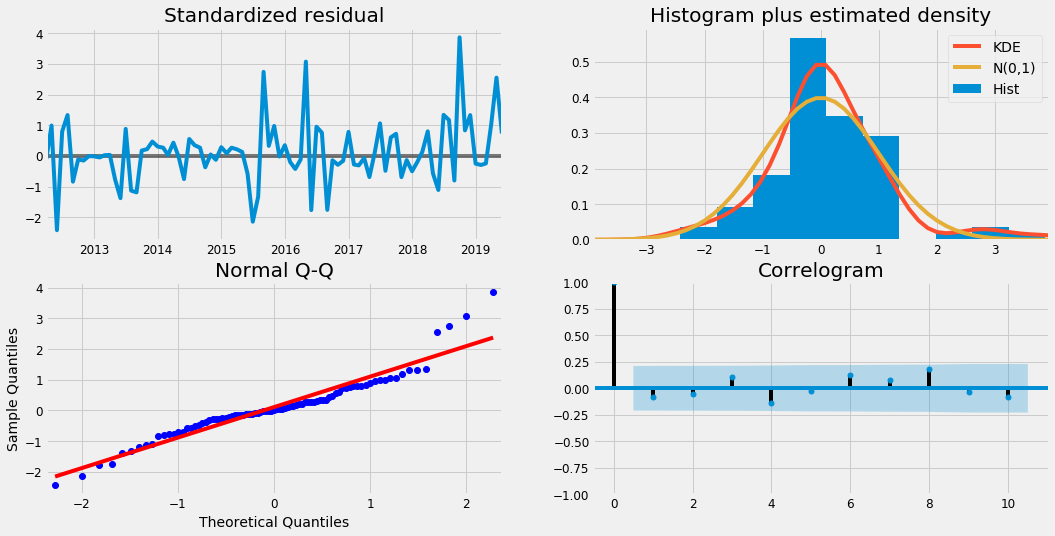

In [42]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

Notes:

## Validating forecasts

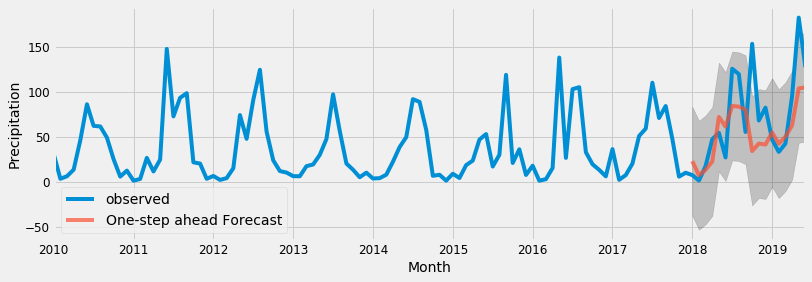

In [43]:
test_start = '2018-01-01' # change the start of test data
pred = results.get_prediction(start=pd.to_datetime(test_start), dynamic=False)
pred_ci = pred.conf_int()

ax = y[train_start:].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(12, 4))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel(timestamp)
ax.set_ylabel(weather_aspect)
plt.legend()

plt.show()

The line plot is showing the observed values compared to the rolling forecast predictions.

In [44]:
y_forecasted = pred.predicted_mean
y_truth = y[test_start:]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1701.63


In [45]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 41.25


## Producing and visualizing forecasts

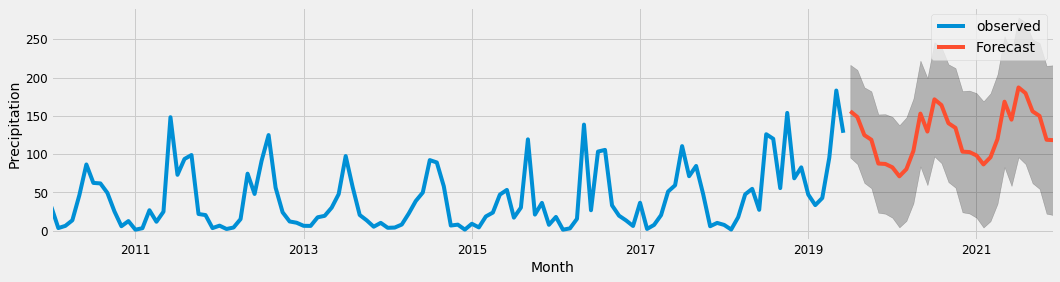

In [46]:
pred_uc = results.get_forecast(steps=30) # change the amount of predicted data
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(16, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel(timestamp)
ax.set_ylabel(weather_aspect)

plt.legend()
plt.show()